# Project Plotting - Introduction to `matplotlib`

During data analysis, the best tool is not neural networks, but plotting. Python has loads of ready-use plotting utilities, among which [matplotlib](https://matplotlib.org/) is definitely worth a try.

## Installation

```shell
pip install matplotlib
```

## Disclaimer

A big portion of the contents here references [the official documentation](https://matplotlib.org/). Don't be surprised when you read an identical example there.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# mpl.rcParams['figure.dpi']=400
%config InlineBackend.figure_format = 'svg'

## Basic Example

Matplotlib graphs your data on **Figures** (i.e., windows, Jupyter widgets, etc.), each of which can contain one or more **Axes** (i.e., an area where points can be specified in terms of $xOy$ coordinates, or $r\theta$ in a polar plot, or $xyz$ in a 3D plot, etc.). The simplest way of creating a figure with an axes is using `pyplot.subplots`. We can then use `Axes.plot` to draw some data on the axes:

fig: Figure(432x288)
ax: AxesSubplot(0.125,0.125;0.775x0.755)


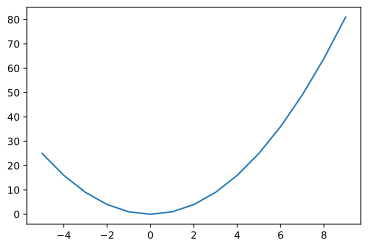

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes
print("fig:", fig)
print("ax:", ax)
ax.plot(list(range(-5, 10)), list(map(lambda x: x**2, range(-5, 10))))  # Plot some data on the axes

The above code use `subplots` to create a figure with axes. Then it uses `plot()` method (belongs to the axes) to plot the data.

## Components

The figure below contains all parts that make up such a plot.

> The following image is extracted from [matplotlib.org](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).

![](https://matplotlib.org/stable/_images/anatomy.png)

### Figure

The whole figure. The figure keeps track of all the child Axes (0 or 1 or any number of them), a smattering of 'special' artists (titles, figure legends, etc), and the canvas (ignore this concept for now).

The easiest way to create a new figure is with pyplot:

<Figure size 432x288 with 0 Axes>

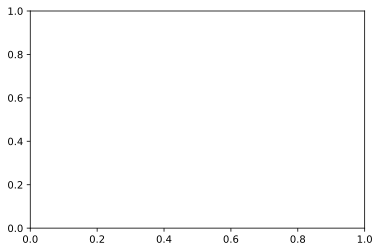

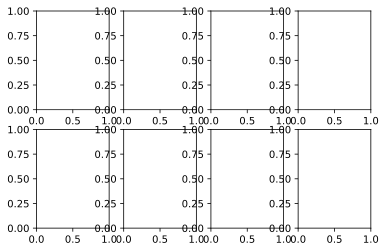

In [3]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 4)  # a figure with a 2x4 grid of Axes

### Axes

This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) **Axis** objects which take care of the data limits (the data limits can also be controlled via the `axes.Axes.set_xlim()` and `axes.Axes.set_ylim()` methods). Each Axes has a title (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label (set via `set_ylabel()`).

The Axes class and its member functions are the primary entry point to working with the object-oriented interface.

### Axis¶

These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a **Locator** object and the ticklabel strings are formatted by a **Formatter**. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### Artist

Basically, everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc.. When the figure is rendered, all of the artists are drawn to the canvas.

Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

### Plotting functions

All of plotting functions expect `numpy.array` or `numpy.ma.masked_array` as input. Classes that are 'array-like' such as pandas data objects and `numpy.matrix` may or may not work as intended. It is best to convert these to `numpy.array` objects prior to plotting.

Example for converting a numpy matrix to numpy array:

In [4]:
a = np.matrix([[1, 2], [3, 4]])
a_asarray = np.asarray(a)
print(type(a), "->", type(a_asarray))

<class 'numpy.matrix'> -> <class 'numpy.ndarray'>


There are two major styles of plotting with matplotlib, the object-oriented style and `pyplot` style.

#### OO-style

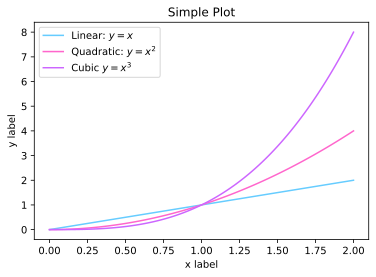

In [5]:
x = np.linspace(0, 2, 100) # begin-end-step definition, creates an array

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='Linear: $y=x$', color="#66ccff")  # Plot some data on the axes.
ax.plot(x, x**2, label='Quadratic: $y=x^2$', color="#ff66cc")  # Plot more data on the axes...
ax.plot(x, x**3, label='Cubic $y=x^3$', color="#cc66ff")  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

#### `pyplot`-style

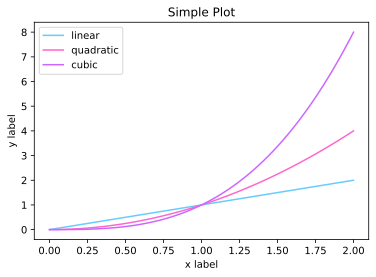

In [9]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear', color="#66ccff")  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic', color="#ff66cc")  # etc.
plt.plot(x, x**3, label='cubic', color="#cc66ff")
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

Read through the above examples carefully: don't ask for synopsis of certain functions at first, but grasp how the figure is built bit by bit.

### Repetitive Plotting

The official documentation recommends a plotter function to assist repetitive plotting over one format / axes:

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out